# **Distance vector algorithm**



In [0]:
#Author: Santiago Rios Guiral
#Email: santiagoguiralwe@gmail.com

import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
n_nodes = int(input("Number of nodes in the topology: "))
nodes = ['n{}'.format(i) for i in range(1, n_nodes+1)]
n_links = random.randint (n_nodes,(n_nodes*n_nodes-n_nodes)/2)

print(f'The number of links is: {n_links}')

Number of nodes in the topology: 6
The number of links is: 12


In [0]:
#function that generates a random topoly
#arguments is the number of nodes and the number of links created
def generate_topo(n_links,n_nodes):
    n_connect = ['n{}'.format(i) for i in range(1, n_nodes+1)]
    connections={}
    topology={}
    #generates a dict (key node, value possible connections)
    for i in range(1,n_nodes+1):
        connections['n{}'.format(i)]=['n{}'.format(j) for j in range(1, n_nodes+1) if j!=i]
    iterator=n_links
    remain=n_links-n_nodes
    init_point=random.choice(n_connect)
    #generates a random link between nodes
    while iterator>0:
        #when the numbers of links are equal to the amount of nodes, guarantees at lest one link per node
        if iterator>remain:
            n_connect.remove(init_point)
            end_point = random.choice(connections.get(init_point))
            link = (init_point,end_point)
            connections[init_point].remove(end_point)
            connections[end_point].remove(init_point)
            if len(n_connect)>0:
                init_point = random.choice(n_connect)
        #add links to the topology randomly
        else:
            again = True
            while (again):
              k = list(connections.keys())
              init_point=random.choice(k)
              if (len(connections.get(init_point))>0):
                  again=False
                  end_point=random.choice(connections.get(init_point))
                  link = (init_point,end_point)
                  connections[init_point].remove(end_point)
                  connections[end_point].remove(init_point)
              else:
                  del connections[init_point]
        topology[link] = random.randrange(1,10)
        iterator-=1
    return topology

In [4]:
topo=generate_topo(n_links,n_nodes)
print(topo)

{('n2', 'n1'): 6, ('n6', 'n2'): 4, ('n3', 'n1'): 3, ('n4', 'n3'): 4, ('n1', 'n5'): 6, ('n5', 'n2'): 6, ('n3', 'n2'): 3, ('n5', 'n4'): 8, ('n5', 'n3'): 2, ('n4', 'n2'): 8, ('n6', 'n4'): 1, ('n6', 'n5'): 7}


# **Plot topology**

In [0]:
#Plot the topology, argument is a dict with key as node link and value is the edge cost
def plot_topo (topo):
    plt.figure(1,figsize=(12,8))
    G=nx.Graph()
    for edge in topo:
        G.add_edge(edge[0], edge[1])
    graph_pos=nx.shell_layout(G)
    nx.draw_networkx_nodes(G,graph_pos,node_color='yellow',node_size=800)
    nx.draw_networkx_edges(G,graph_pos,edge_color='red')
    nx.draw_networkx_labels(G, graph_pos)
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels = topo)
    plt.show()
    data = nx.info(G)


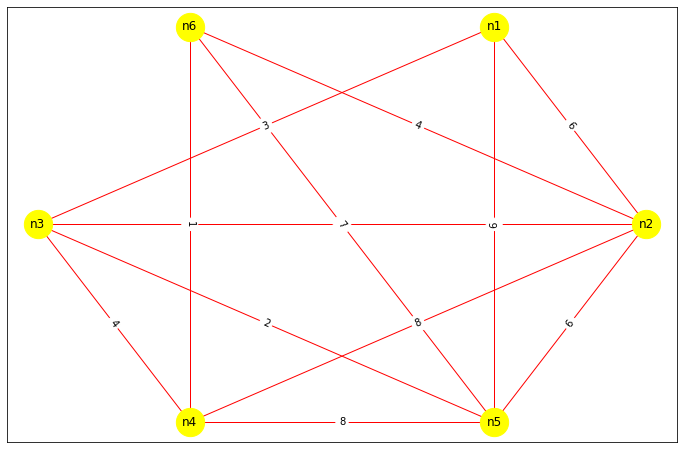

In [6]:
plot_topo(topo)

# **Distance vector algorithm**

Initialization of the algorithm

In [0]:
#initialization for the distance vector table for every node
topology_table={}

for key in nodes:
  node_table=[]
  for node in nodes:
    row_table={}
    for n in nodes:
      if (key==node):
        if (node==n):
          row_table[(node,n)] = 0
        elif ((node,n) in topo):
          row_table[(node,n)]=topo.get((node,n))
        elif ((n,node) in topo):
          row_table[(node,n)]=topo.get((n,node))
        else:
          row_table[(node,n)]=1e10
      else:
        if (((node,key) in topo) or ((key,node) in topo)):
          row_table[(node,n)]=1e10
    if row_table:
      node_table.append(row_table)
  topology_table[key]=node_table


In [8]:
#k -> node; list->table where every key is the pair (neigbors-own vector,nodes in the topology) and the value is the cost
for k in topology_table:
  print(k, topology_table.get(k))

n1 [{('n1', 'n1'): 0, ('n1', 'n2'): 6, ('n1', 'n3'): 3, ('n1', 'n4'): 10000000000.0, ('n1', 'n5'): 6, ('n1', 'n6'): 10000000000.0}, {('n2', 'n1'): 10000000000.0, ('n2', 'n2'): 10000000000.0, ('n2', 'n3'): 10000000000.0, ('n2', 'n4'): 10000000000.0, ('n2', 'n5'): 10000000000.0, ('n2', 'n6'): 10000000000.0}, {('n3', 'n1'): 10000000000.0, ('n3', 'n2'): 10000000000.0, ('n3', 'n3'): 10000000000.0, ('n3', 'n4'): 10000000000.0, ('n3', 'n5'): 10000000000.0, ('n3', 'n6'): 10000000000.0}, {('n5', 'n1'): 10000000000.0, ('n5', 'n2'): 10000000000.0, ('n5', 'n3'): 10000000000.0, ('n5', 'n4'): 10000000000.0, ('n5', 'n5'): 10000000000.0, ('n5', 'n6'): 10000000000.0}]
n2 [{('n1', 'n1'): 10000000000.0, ('n1', 'n2'): 10000000000.0, ('n1', 'n3'): 10000000000.0, ('n1', 'n4'): 10000000000.0, ('n1', 'n5'): 10000000000.0, ('n1', 'n6'): 10000000000.0}, {('n2', 'n1'): 6, ('n2', 'n2'): 0, ('n2', 'n3'): 3, ('n2', 'n4'): 8, ('n2', 'n5'): 6, ('n2', 'n6'): 4}, {('n3', 'n1'): 10000000000.0, ('n3', 'n2'): 10000000000.

In [0]:
#function that shares the node's distance vector to the other nodes in the topology
def send_dx_neighbors (topology_table):
  for n in topology_table:
    table=topology_table.get(n)
    for row in table:
      if ((list(row.keys()))[0][0] == n):
        dist_vector = row
    
    for node in topology_table:
      if (n!=node):
        table_compare = topology_table.get(node)
        for row_comp in table_compare:
          if (list(dist_vector.keys())[0][0] == list(row_comp.keys())[0][0]):
            pos = table_compare.index(row_comp)
            table_compare[pos]=dist_vector

  return topology_table


In [10]:
#the route table for every node
#key -> node ; list -> table where every dict is the row for the own distance vector or the neighbors
topology_table = send_dx_neighbors(topology_table)

for k in topology_table:
  print(k, topology_table.get(k))

n1 [{('n1', 'n1'): 0, ('n1', 'n2'): 6, ('n1', 'n3'): 3, ('n1', 'n4'): 10000000000.0, ('n1', 'n5'): 6, ('n1', 'n6'): 10000000000.0}, {('n2', 'n1'): 6, ('n2', 'n2'): 0, ('n2', 'n3'): 3, ('n2', 'n4'): 8, ('n2', 'n5'): 6, ('n2', 'n6'): 4}, {('n3', 'n1'): 3, ('n3', 'n2'): 3, ('n3', 'n3'): 0, ('n3', 'n4'): 4, ('n3', 'n5'): 2, ('n3', 'n6'): 10000000000.0}, {('n5', 'n1'): 6, ('n5', 'n2'): 6, ('n5', 'n3'): 2, ('n5', 'n4'): 8, ('n5', 'n5'): 0, ('n5', 'n6'): 7}]
n2 [{('n1', 'n1'): 0, ('n1', 'n2'): 6, ('n1', 'n3'): 3, ('n1', 'n4'): 10000000000.0, ('n1', 'n5'): 6, ('n1', 'n6'): 10000000000.0}, {('n2', 'n1'): 6, ('n2', 'n2'): 0, ('n2', 'n3'): 3, ('n2', 'n4'): 8, ('n2', 'n5'): 6, ('n2', 'n6'): 4}, {('n3', 'n1'): 3, ('n3', 'n2'): 3, ('n3', 'n3'): 0, ('n3', 'n4'): 4, ('n3', 'n5'): 2, ('n3', 'n6'): 10000000000.0}, {('n4', 'n1'): 10000000000.0, ('n4', 'n2'): 8, ('n4', 'n3'): 4, ('n4', 'n4'): 0, ('n4', 'n5'): 8, ('n4', 'n6'): 1}, {('n5', 'n1'): 6, ('n5', 'n2'): 6, ('n5', 'n3'): 2, ('n5', 'n4'): 8, ('n5', 

Algorithm cycle where the distance vector for every node is update

In [0]:
#val update_vectors checks for changes in the distance vector; val list_update_vectors is every row of the table to append
update_vectors = True

while(update_vectors):
  list_update_vector=[]
  for key in topology_table:
    neighbors=[]
    table_pairs={}
    table = topology_table.get(key)

    #loop that get the current distance vector
    for row in table:
      if(key==((list(row.keys()))[0][0])):
        dist_vector = row
      for item in row:
        table_pairs[item]=row.get(item)
    #creates a list with al the pairs node-edges to access the table route of the current node
    for item in dist_vector:
      if ((item in topo) or ((item[1],item[0]) in topo)):
        neighbors.append(item[1])

    #loop that calculates the new distance vector for the nodes
    new_dist_vector={}
    for n in nodes:
      cost_to_node = []
      if(n!=key):
        cost_to_node.append(dist_vector.get((key,n)))
        for node in neighbors:
          if (n!=node):
            direct_cost = table_pairs.get((key,node))
            alt_cost = table_pairs.get((node,n))
            cost = direct_cost+alt_cost
            cost_to_node.append(cost)
        new_dist_vector[(key,n)]=min(cost_to_node)
      else:
        new_dist_vector[(key,key)]=table_pairs.get((key,key))

    #updates the table of the node with the new distance vector
    list_vectors=[]
    for element in topology_table:
      if (key==element):
        table_compare=topology_table.get(key)
        for row_compare in table_compare:
          if(list(new_dist_vector.keys())[0][0]  == list(row_compare.keys())[0][0]):
            old_cost = list(row_compare.values())
            new_cost = list(new_dist_vector.values())
            if (new_cost!=old_cost):
              new_vector=new_dist_vector           
              list_update_vector.append(True)
            else:
              new_vector=row_compare
              list_update_vector.append(False)
          else:
            new_vector=row_compare
            list_update_vector.append(False)
          list_vectors.append(new_vector)
        topology_table[element]=list_vectors   

  topology_table = send_dx_neighbors(topology_table)
  #bool that checks if there are changes in the distance vectors
  if (True not in list_update_vector):
    update_vectors=False


In [12]:
for k in topology_table:
  print(k,topology_table.get(k))

n1 [{('n1', 'n1'): 0, ('n1', 'n2'): 6, ('n1', 'n3'): 3, ('n1', 'n4'): 7, ('n1', 'n5'): 5, ('n1', 'n6'): 8}, {('n2', 'n1'): 6, ('n2', 'n2'): 0, ('n2', 'n3'): 3, ('n2', 'n4'): 5, ('n2', 'n5'): 5, ('n2', 'n6'): 4}, {('n3', 'n1'): 3, ('n3', 'n2'): 3, ('n3', 'n3'): 0, ('n3', 'n4'): 4, ('n3', 'n5'): 2, ('n3', 'n6'): 5}, {('n5', 'n1'): 5, ('n5', 'n2'): 5, ('n5', 'n3'): 2, ('n5', 'n4'): 6, ('n5', 'n5'): 0, ('n5', 'n6'): 7}]
n2 [{('n1', 'n1'): 0, ('n1', 'n2'): 6, ('n1', 'n3'): 3, ('n1', 'n4'): 7, ('n1', 'n5'): 5, ('n1', 'n6'): 8}, {('n2', 'n1'): 6, ('n2', 'n2'): 0, ('n2', 'n3'): 3, ('n2', 'n4'): 5, ('n2', 'n5'): 5, ('n2', 'n6'): 4}, {('n3', 'n1'): 3, ('n3', 'n2'): 3, ('n3', 'n3'): 0, ('n3', 'n4'): 4, ('n3', 'n5'): 2, ('n3', 'n6'): 5}, {('n4', 'n1'): 7, ('n4', 'n2'): 5, ('n4', 'n3'): 4, ('n4', 'n4'): 0, ('n4', 'n5'): 6, ('n4', 'n6'): 1}, {('n5', 'n1'): 5, ('n5', 'n2'): 5, ('n5', 'n3'): 2, ('n5', 'n4'): 6, ('n5', 'n5'): 0, ('n5', 'n6'): 7}, {('n6', 'n1'): 8, ('n6', 'n2'): 4, ('n6', 'n3'): 5, ('n6

# Topology table

In [0]:
df_list=[]
for key in topology_table:
  node_df={}
  nodes=list(topology_table.keys())
  node_df[f'Node {key}']=[]
  table=topology_table.get(key)
  cost_list=[]
  for row in table:
    cost=list(row.values())
    cost_list.append(cost)
    neighbors=list(row.keys())
    node_df[f'Node {key}'].append(neighbors[0][0])
  cost_values=np.transpose(cost_list)
  for i in range(len(nodes)):
    node_df[f'{nodes[i]}']=list(cost_values[i])

  df=pd.DataFrame(node_df)
  df_list.append(df)

In [14]:
topology=pd.concat(df_list,axis='columns',sort=False)
topology.fillna("",inplace=True)
topology

,Node n1,n1,n2,n3,n4,n5,n6,Node n2,n1,n2,n3,n4,n5,n6,Node n3,n1,n2,n3,n4,n5,n6,Node n4,n1,n2,n3,n4,n5,n6,Node n5,n1,n2,n3,n4,n5,n6,Node n6,n1,n2,n3,n4,n5,n6
0,n1,0,6,3,7,5,8,n1,0,6,3,7,5,8,n1,0,6,3,7,5,8,n2,6,0,3,5,5,4,n1,0,6,3,7,5,8,n2,6,0,3,5,5,4
1,n2,6,0,3,5,5,4,n2,6,0,3,5,5,4,n2,6,0,3,5,5,4,n3,3,3,0,4,2,5,n2,6,0,3,5,5,4,n4,7,5,4,0,6,1
2,n3,3,3,0,4,2,5,n3,3,3,0,4,2,5,n3,3,3,0,4,2,5,n4,7,5,4,0,6,1,n3,3,3,0,4,2,5,n5,5,5,2,6,0,7
3,n5,5,5,2,6,0,7,n4,7,5,4,0,6,1,n4,7,5,4,0,6,1,n5,5,5,2,6,0,7,n4,7,5,4,0,6,1,n6,8,4,5,1,7,0
4,,,,,,,,n5,5,5,2,6,0,7,n5,5,5,2,6,0,7,n6,8,4,5,1,7,0,n5,5,5,2,6,0,7,,,,,,,
5,,,,,,,,n6,8,4,5,1,7,0,,,,,,,,,,,,,,,n6,8,4,5,1,7,0,,,,,,,
